In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [5]:
DATADIR = "C:/Users/shvmt/Documents/GitHub/MachineLearning-DataScience/Week5/Dogs & Cats/PetImages"
animals = ["Dog", "Cat"]

## LOADING DATA

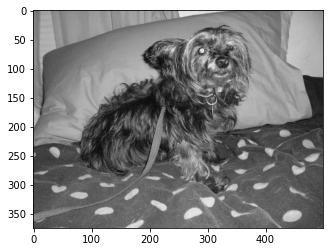

In [44]:
for animal in animals:
    path = os.path.join(DATADIR, animal) #path to dog/cat directory
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_arr, cmap='gray')
        plt.show()
        break
    break

In [9]:
print(img_arr)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


In [10]:
print(img_arr.shape)

(375, 500)


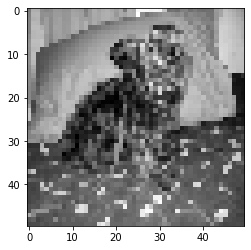

In [31]:
img_resize = 50

new_arr = cv2.resize(img_arr, (img_resize, img_resize)) #resizing all images to the
#same size
plt.imshow(new_arr, cmap='gray')
plt.show()

## Creating Training Dataset

In [29]:
training_data = []

def create_training_data():
    for animal in animals:
        path = os.path.join(DATADIR, animal) #path to dog/cat directory
        class_num = animals.index(animal)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_arr = cv2.resize(img_arr, (img_resize, img_resize))
                training_data.append([new_arr, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [30]:
print(len(training_data))

24946


In [33]:
#Shufflin through our data
import random

random.shuffle(training_data)

## Checking if data was created correctly

0


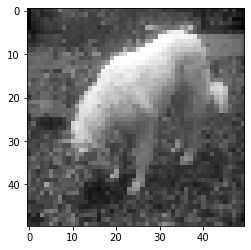

1


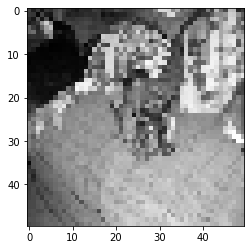

1


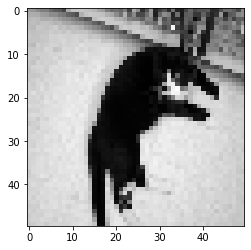

0


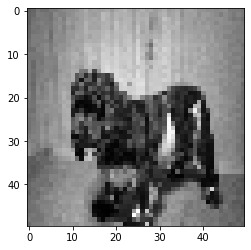

0


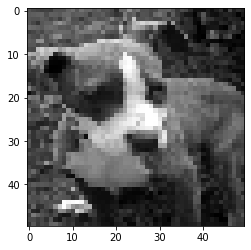

0


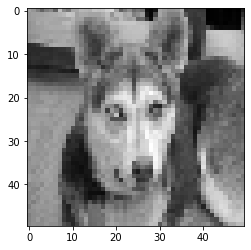

0


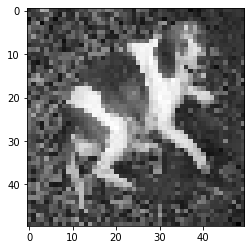

0


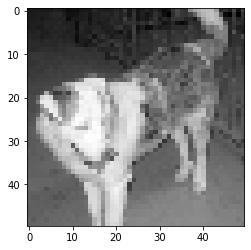

0


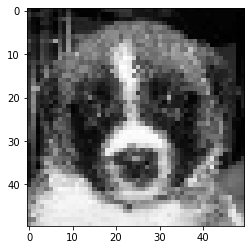

0


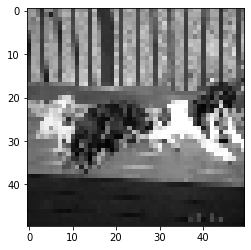

In [35]:
for sample in training_data[:10]:
    print(sample[1])
    plt.imshow(sample[0], cmap='gray')
    plt.show()

In [37]:
X = []
y = []

In [38]:
for feature, label in training_data:
    X.append(feature)
    y.append(label)
    
X = np.array(X).reshape(-1, img_resize, img_resize, 1)

In [42]:
np.save('features.npy', X) #saving
X = np.load('features.npy') #loading